**Model 2 Fitur 1 :  Inflation Prediction**

The objective of this model is to predict future inflation rates over a period of time based on past inflation data. Using a Long Short-Term Memory (LSTM) network, the model learns from the historical data to forecast inflation trends. The model utilizes MinMaxScaler to scale the inflation data and the LSTM layer in TensorFlow for time-series forecasting.This model is specifically designed for forecasting inflation for the next 12 months (1 year) or 24 months (2 years), providing users with actionable insights for financial planning.

#  Import Library

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Preprocessing

Load the inflation data from a CSV file. Preprocess the data by scaling it to a range between 0 and 1. This helps the LSTM model learn more effectively. Also, prepare the data for time series analysis by creating sequences of past inflation values to predict the next value.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
inflation= pd.DataFrame(pd.read_csv("drive/MyDrive/data_clean/inflasi_clean2.csv"))

In [ ]:
data.shape

(262, 2)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
inflation_scaled = scaler.fit_transform(data[['Data_Inflasi']])
def create_dataset(dataset, look_back=12):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
look_back = 12
X, y = create_dataset(inflation_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X.shape, y.shape

((250, 12, 1), (250,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 12, 1), (50, 12, 1), (200,), (50,))

# Model Architecture & Model Training
The model uses the following architecture:

1. LSTM Layer 1: The first LSTM layer consists of 256 units with ReLU activation and L2 regularization to avoid overfitting. It returns sequences to feed the next LSTM layer.
2. LSTM Layer 2: The second LSTM layer contains 128 units, with ReLU activation. It processes the sequences outputted from the previous layer.
3. Dense Layer: A dense layer with a single neuron outputs the predicted inflation rate.
Optimizer and Loss Function

Adam optimizer with a learning rate of 0.001,The Mean Squared Error (MSE) loss function and model includes an EarlyStopping callback, which halts training if the validation loss does not improve for 20 epochs, ensuring the model doesn’t overfit.


In [ ]:
model = Sequential([
    LSTM(256, activation='relu', input_shape=(look_back, 1), return_sequences=True, kernel_regularizer='l2'),
    LSTM(128, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train,validation_split=0.2,epochs=100,batch_size=16,callbacks=[early_stopping],verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0990 - mae: 0.2223 - val_loss: 0.0552 - val_mae: 0.1724
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0425 - mae: 0.1337 - val_loss: 0.0431 - val_mae: 0.1120
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0265 - mae: 0.0903 - val_loss: 0.0340 - val_mae: 0.1329
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0236 - mae: 0.1006 - val_loss: 0.0310 - val_mae: 0.0982
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0227 - mae: 0.0847 - val_loss: 0.0264 - val_mae: 0.1109
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0249 - mae: 0.1025 - val_loss: 0.0251 - val_mae: 0.0960
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0152 - mae: 0.0754 - val_loss: 0.0229 - val_mae: 0.1004
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0206 - mae: 0.0887 - val_loss: 0.0227 - val_mae: 0.1051
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - lo

# Model Evaluation

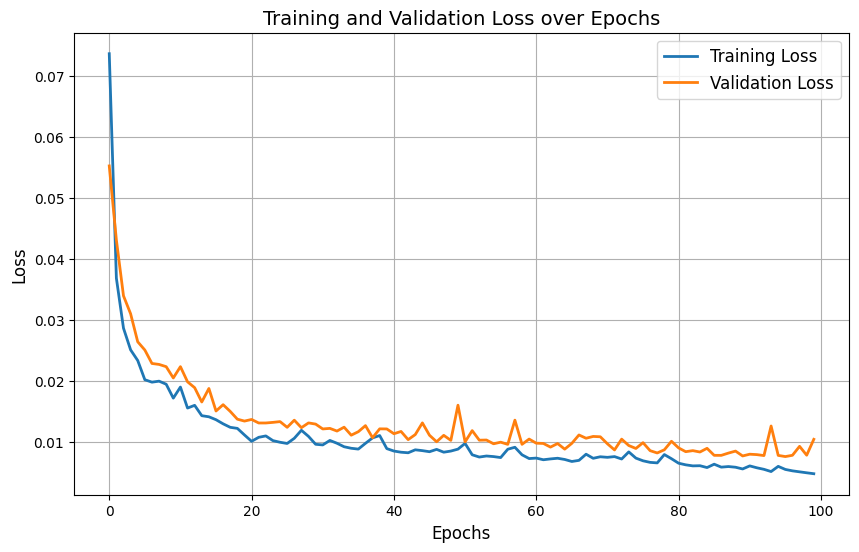

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training and Validation Loss over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


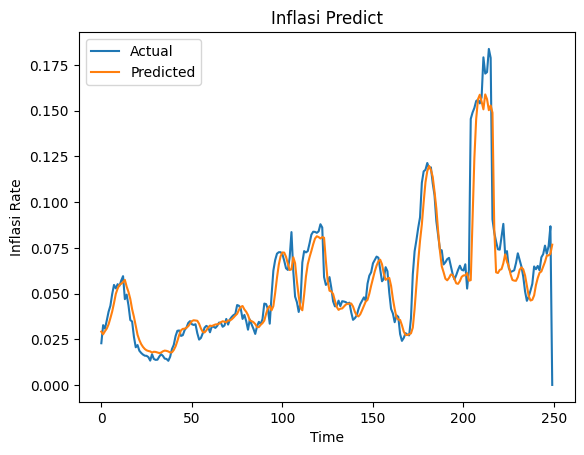

In [ ]:
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)
actual_inflation = scaler.inverse_transform(y.reshape(-1, 1))
plt.plot(actual_inflation)
plt.plot(train_predict)
plt.title('Inflasi Predict')
plt.xlabel('Time')
plt.ylabel('Inflasi Rate')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()

Root Mean Squared Error (RMSE): 0.07208722988661519


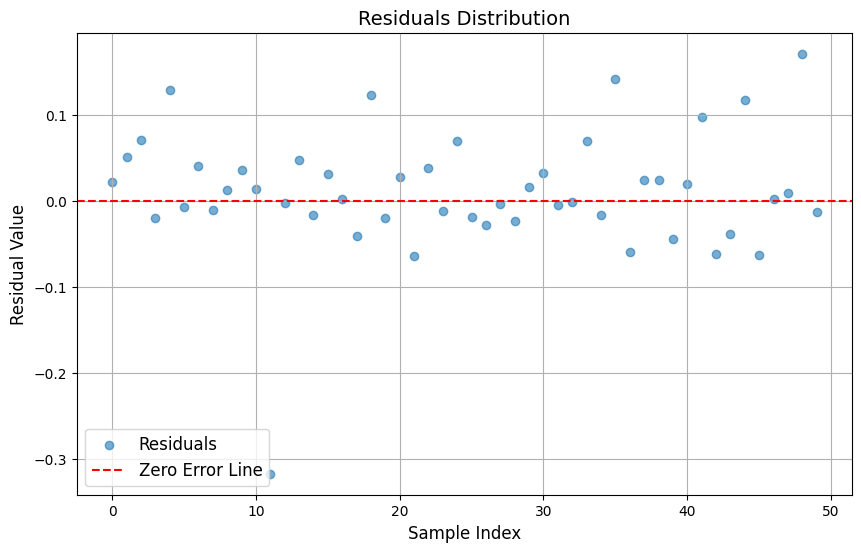

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
residuals = y_test - y_pred
print("Root Mean Squared Error (RMSE):", rmse)

residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals.flatten(), alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title("Residuals Distribution", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Residual Value", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Save model and Mappings

In [ ]:
model.save('inflasi_fix.h5')
print("Model telah disimpan")

Model telah disimpan


In [ ]:
model.save('inflasi_fix.keras')
print("Model berhasil disimpan dalam format .keras")

Model berhasil disimpan dalam format .keras


In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Inflation Prediction

In [ ]:
def predict_future_inflation(model, data, scaler, look_back, future_months=12):
    predictions = []
    last_data = data[-look_back:].reshape((1, look_back, 1))
    for _ in range(future_months):
        next_inflation = model.predict(last_data)
        predictions.append(next_inflation[0, 0])
        next_inflation = next_inflation.reshape(1, 1, 1)  # Ubah ke dimensi [1, 1, 1]
        last_data = np.append(last_data[:, 1:, :], next_inflation, axis=1)  # Gabungkan ke input
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

future_months = 12
# Panggil fungsi prediksi
future_predictions = predict_future_inflation(model, scaled, scaler, look_back, future_months)
# Konversi hasil prediksi ke persen
future_predictions_percent = future_predictions.flatten() * 100
# Tampilkan hanya prediksi bulan terakhir
final_prediction = future_predictions_percent[-1]
print(f"Prediksi inflasi (1 tahun ke depan): {final_prediction:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediksi inflasi (1 tahun ke depan): 3.59%


In [ ]:
def predict_future_inflation(model, data, scaler, look_back, future_months=24):
    predictions = []
    last_data = data[-look_back:].reshape((1, look_back, 1))
    for _ in range(future_months):
        next_inflation = model.predict(last_data)
        predictions.append(next_inflation[0, 0])
        next_inflation = next_inflation.reshape(1, 1, 1)  # Ubah ke dimensi [1, 1, 1]
        last_data = np.append(last_data[:, 1:, :], next_inflation, axis=1)  # Gabungkan ke input
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

future_months = 24
# Panggil fungsi prediksi
future_predictions = predict_future_inflation(model, scaled, scaler, look_back, future_months)
# Konversi hasil prediksi ke persen
future_predictions_percent = future_predictions.flatten() * 100
# Tampilkan hanya prediksi bulan terakhir
final_prediction = future_predictions_percent[-1]
print(f"Prediksi inflasi(2 tahun ke depan): {final_prediction:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediksi inflasi(2 tahun ke depan): 4.06%


In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.3
aiohttp                            3.11.2
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.6
astropy-iers-data                  0.2024.11.18.0.35.2
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread           